In [1]:
import torchvision
import torch
from torchvision import transforms
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt

In [2]:
transformations = transforms.Compose([
    transforms.CenterCrop(255),
    transforms.Resize(100),
    transforms.ToTensor()])

In [3]:
voc_data = torchvision.datasets.Cityscapes('data', split="train", mode="fine", target_type="semantic", transform=transformations, target_transform=transformations)

In [4]:
data_loader = torch.utils.data.DataLoader(voc_data,batch_size=32,shuffle=True)

In [31]:
one, two = voc_data.__getitem__(15)

# Feature Extraction

In [6]:
def get_features(image, seg):
    
    image = np.transpose(image,(1,2,0))
    nrows, ncols, nchan = image.shape
    features = np.zeros((nrows*ncols, nchan+2))
    y = np.zeros((nrows*ncols))
    count = 0
    for i in range(nrows):
        for j in range(ncols):
            colors = image[i, j, :]
            features[count, :] = [colors[0], colors[1], colors[2], i/100, j/100]
            #features[count, :] = [i, j]
            y[count] = seg[0, i, j]
            count = count + 1
    return features/np.max(features), y

In [7]:
def get_representative(features, y):
    y0 = y[y==np.min(y)]
    y1 = y[y ==np.max(y)]
    samp0_i = np.random.choice(range(len(y0)))
    samp1_i = np.random.choice(range(len(y1)))
    feat0 = features[samp0_i, :]
    feat1 = features[samp1_i, :]
    y0 = y0[samp0_i]
    y1 = y1[samp1_i]
    return feat0, y0, feat1, y1

# Baseline Test

In [8]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score

In [104]:
n = 1
total = 0.0
for i in range(10):
    one, two = voc_data.__getitem__(i)

    X, y = get_features(one.numpy(), two.numpy())

    y = (y/np.min(y))


    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=n)

    neigh = KNeighborsRegressor(n_neighbors=1)

    neigh.fit(X_train, y_train)

    y_hat = neigh.predict(X)

    total += np.mean((y-y_hat)**2)
print(total / 10)

2.8017849330669358


(-0.5, 99.5, 99.5, -0.5)

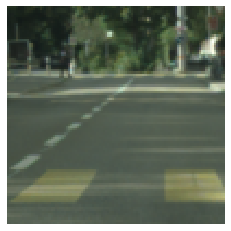

In [88]:
plt.imshow(one.permute((1, 2, 0)))
plt.axis("off")

In [89]:
X[205]

array([0.0984252 , 0.13385827, 0.10629921, 0.02007874, 0.05019685])

(-0.5, 99.5, 99.5, -0.5)

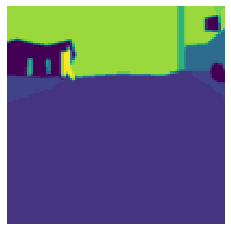

In [90]:
plt.imshow(y.reshape(100, 100))
plt.axis("off")

(-0.5, 99.5, 99.5, -0.5)

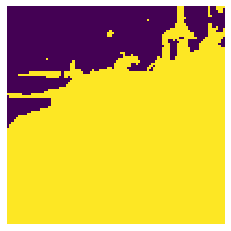

In [91]:
plt.imshow(y_hat.reshape(100, 100))
plt.axis("off")